# Voting Classifier

- 보팅: 같은 데이터셋을 서로 다른 알고리즘이 학습해서 voting하는 방식

- 배깅 : 같은 알고리즘들로 데이터 샘플링을 서로 다르게 가져가면서 학습한 후 voting방식

- 보팅 방식에는 하드보팅, 소프트보팅 방식 존재함

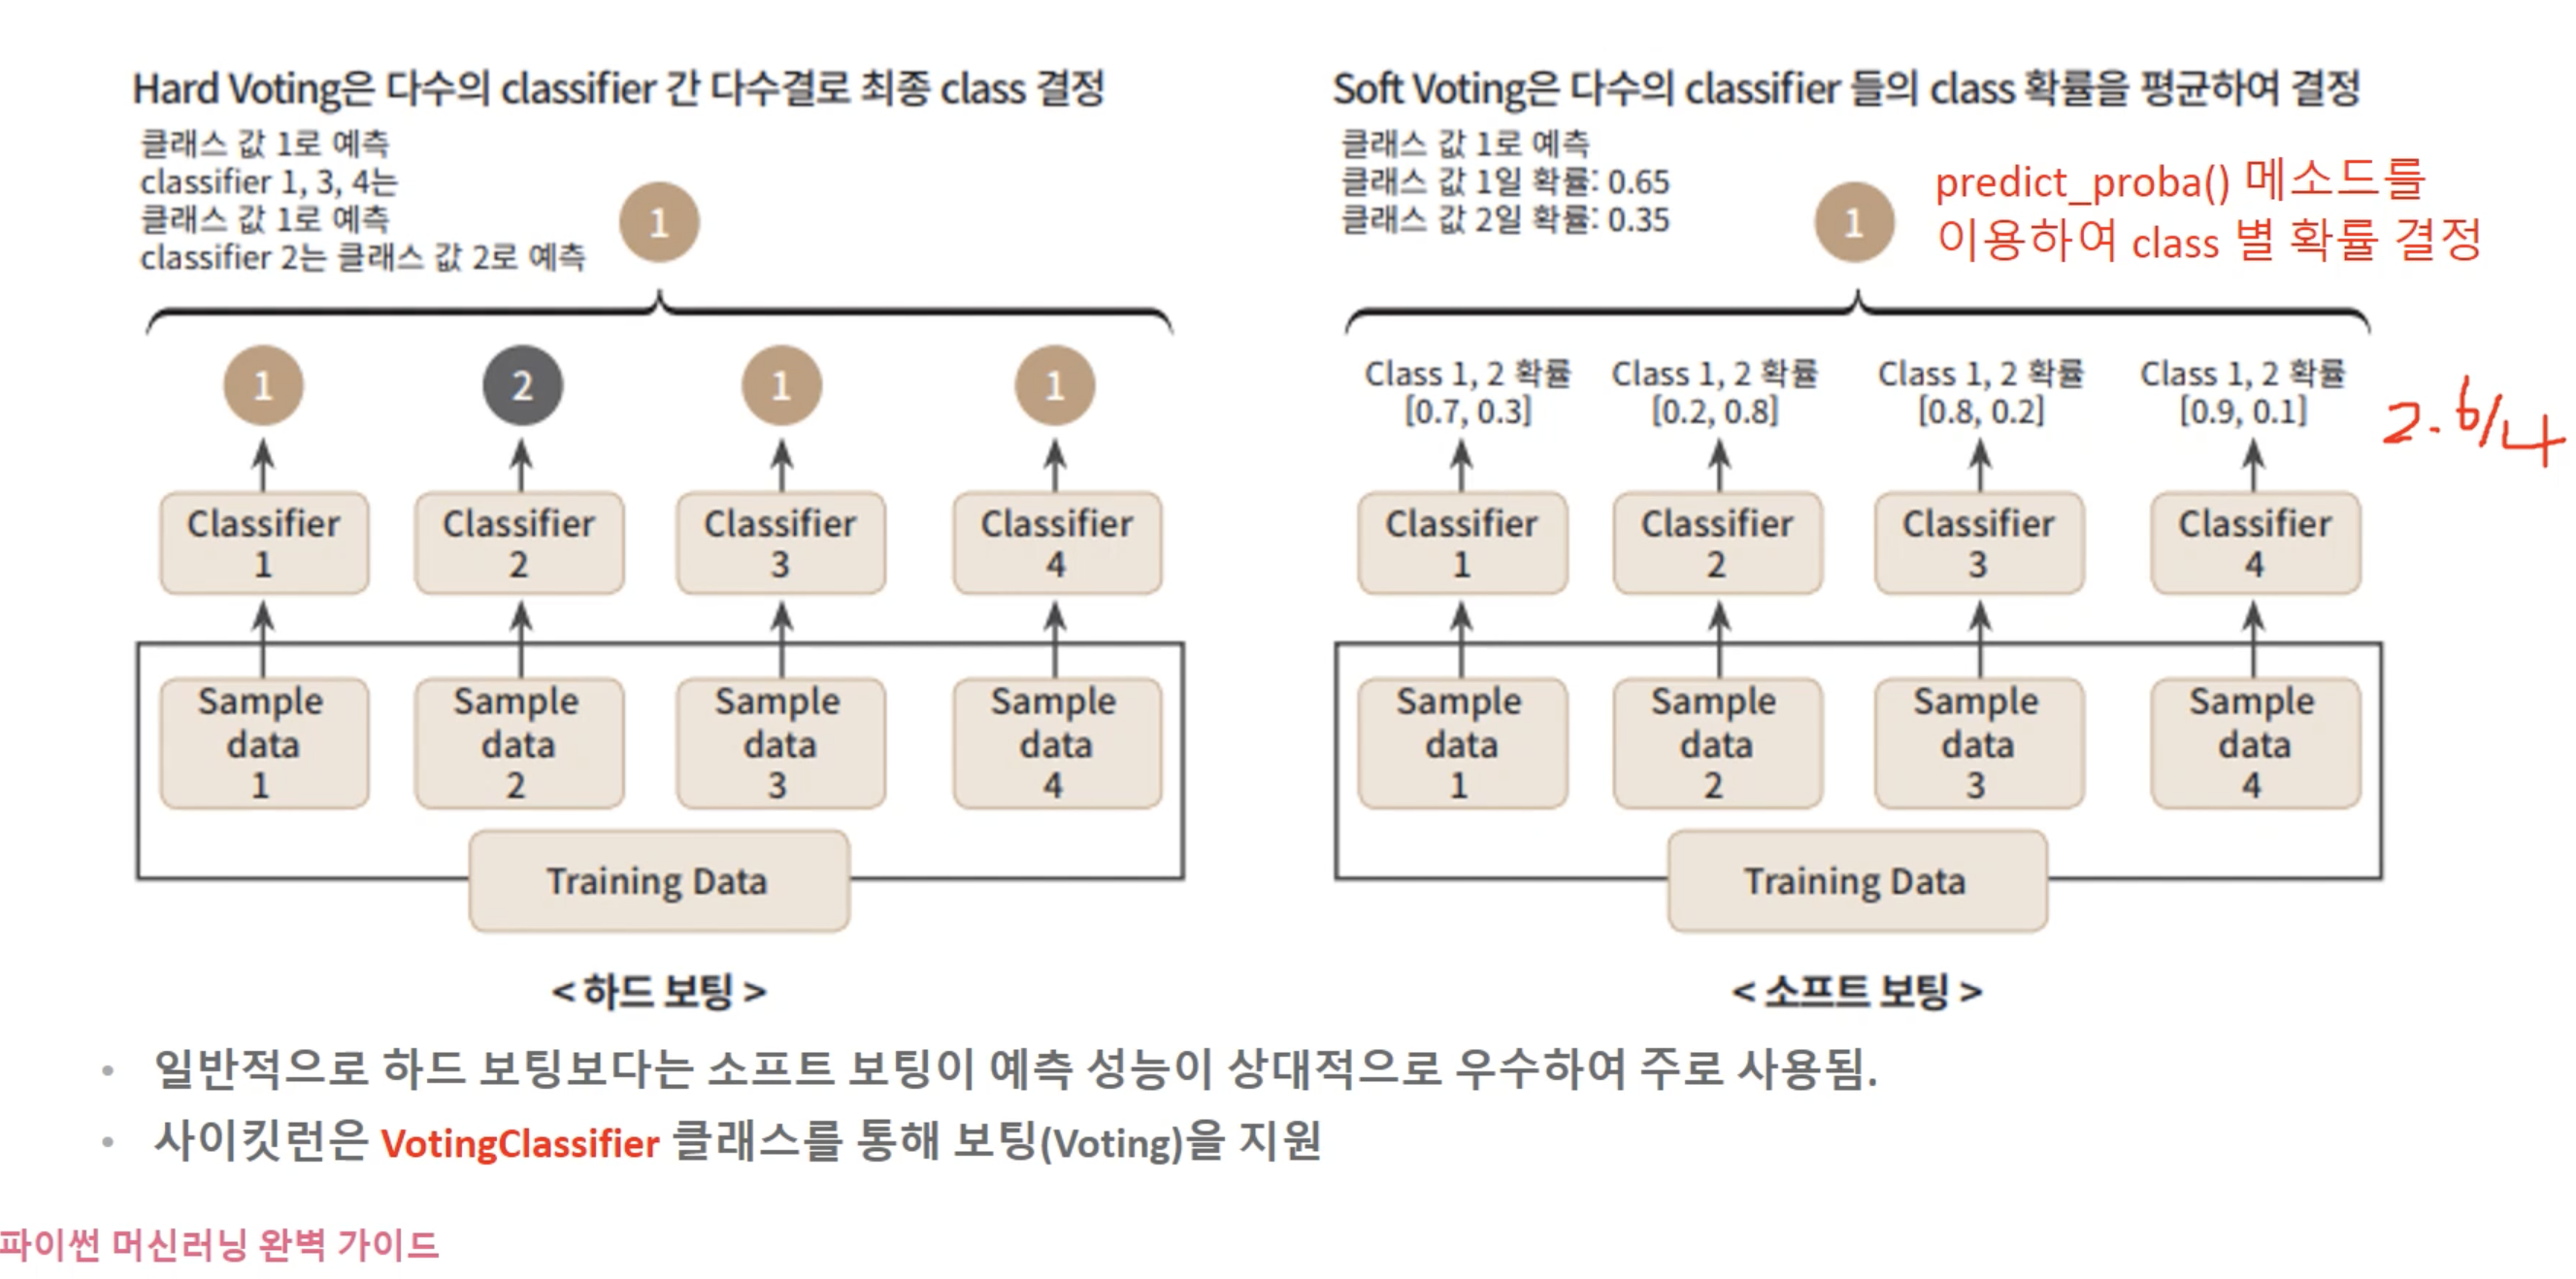

In [1]:
from IPython.display import Image
Image("/Users/younghun/Desktop/영훈/voting.png")

In [2]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# 개별 모델을 정의해주어야 한다
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기(기본값은 하드보팅방식)
# 개별 모델을 estimators라는 리스트 인자에다가 (key, value) 튜플 형태로 넣어주기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf),
                                     ('KNN', knn_clf)],
                         voting='soft')

x_train, x_test, y_train, y_test = train_test_split(cancer.data,
                                                   cancer.target,
                                                   test_size=0.2,
                                                   random_state=42)
# Voting분류기 학습
vo_clf.fit(x_train, y_train)
pred_y = vo_clf.predict(x_test)
print('Voting 분류기 정확도', accuracy_score(y_test, pred_y))

# LR, KNN 개별모델로도 학숩해보기
models = [lr_clf, knn_clf]
for model in models:
    model.fit(x_train, y_train)
    pred_y = model.predict(x_test)
    model_name = model.__class__.__name__
    print(f"{model_name} 정확도 :{accuracy_score(y_test, pred_y)}")

# 로지스틱 리그레션 학습 Converge가 되지 않음..!

Voting 분류기 정확도 0.9473684210526315
LogisticRegression 정확도 :0.956140350877193
KNeighborsClassifier 정확도 :0.956140350877193


/Users/younghun/opt/anaconda3/envs/venvforpython/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/younghun/opt/anaconda3/envs/venvforpython/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    ht

# Bagging - Random Forest

In [5]:
import os
os.chdir('/Users/younghun/Desktop/gitrepo/data/UCI HAR Dataset')

In [6]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [8]:
# 데이터 로드하기
def get_human_dataset():
    feature_name_df = pd.read_csv('features.txt', sep='\s+',
                                 header=None, names=['column_index', 'column_name'])
    # 중복된 칼럼 새롭게 수정
    new_feature_df = get_new_feature_name_df(feature_name_df)
    # feature이름을 변수로 부여하기 위해 리스트 객체로 반환
    feature_name = new_feature_df.iloc[:,1].values.tolist()
    
    x_train = pd.read_csv('./train/X_train.txt',
                         sep='\s+', names=feature_name)
    x_test = pd.read_csv('./test/X_test.txt',
                        sep='\s+', names=feature_name)
    
    y_train = pd.read_csv('./train/y_train.txt',
                         sep='\s+', header=None)
    y_test = pd.read_csv('./test/y_test.txt',
                        sep='\s+', header=None)
    
    return x_train, x_test, y_train, y_test

In [9]:
# Random Forest로 학습시키기
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

x_train, x_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"랜덤 포레스트 정확도 : {acc: .4f}")

랜덤 포레스트 정확도 :  0.9253


In [10]:
# GridSearchCV로 최적의 하이퍼파라미터 찾아주면서 교차검증 해보기
from sklearn.model_selection import GridSearchCV

# search 해볼 파라미터 정의
# n_estimators는 결합해줄 약한 분류기들 개수(디폴트값은 10)
# 나머지 하이퍼파라미터는 Decision Tree와 동일하지만 
# max_features값은 sqrt를 적용한다는 점!
params = {
    'n_estimators' : [50],
    'max_depth': [6,8,10],
    'min_samples_leaf':[8,12,16],
    'min_samples_split':[8,16,20]
}
# n_jobs = -1 로 모든 CPU 집중시키기
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params,
                      cv=2, n_jobs=-1)
grid_cv.fit(x_train, y_train)

# 최적의 파라미터와 최고의 성능 도출
print(f"최적의 파라미터 : {grid_cv.best_params_}")
print(f"최고 성능 : {grid_cv.best_score_}")

최적의 파라미터 : {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 50}
최고 성능 : 0.9166213275299238


In [11]:
# 위에서 도출된 최적의 파라미터로 test데이터에 검증해보기
rf_clf = RandomForestClassifier(max_depth=8, min_samples_leaf=8,
                               min_samples_split=8,
                               n_estimators=50, random_state=43)
rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)

print(f"최고의 파라미터를 적용한 모델의 검증 데이터에 대한 성능:{acc:.4f}")

최고의 파라미터를 적용한 모델의 검증 데이터에 대한 성능:0.9104


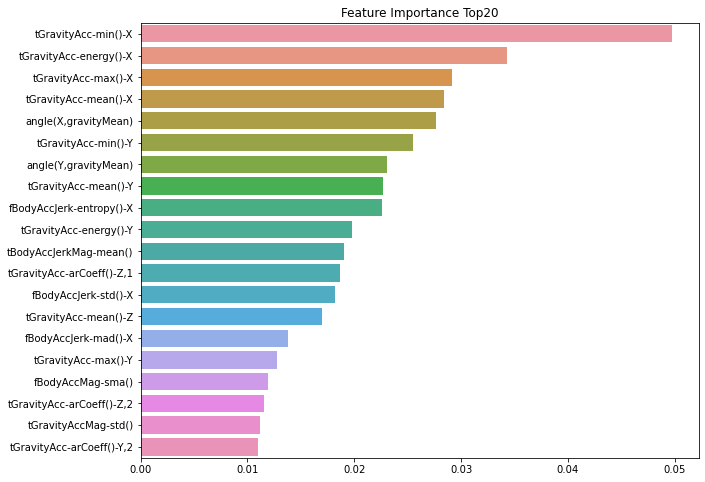

In [19]:
# 개별 features들 중요도 시각화해보기
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importance_values = rf_clf.feature_importances_
ftr_importance = pd.Series(ftr_importance_values,
                          index=x_train.columns)
ftr_top20 = ftr_importance.sort_values(ascending=False)[:20]

plt.figure(figsize=(10,8))
plt.title("Feature Importance Top20")
sns.barplot(x=ftr_top20.values, y=ftr_top20.index)
plt.show()


# GBM(Gradient Boosting Machine)

- 부스팅 기법은 *순차적으로* 학습하기 때문에 오랜시간이 걸리게 됨

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time

x_train, x_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정해보기 - 시작하는 시간
start_time = time.time()

gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train, y_train)
gb_pred = gb_clf.predict(x_test)
gb_acc = accuracy_score(y_test, gb_pred)

print(f"모델 정확도 : {gb_acc :.4f}")
print(f"학습 시간 : {time.time()-start_time :.4f}")

모델 정확도 : 0.9393
학습 시간 : 592.8884


In [22]:
# GridSearchCV를 이용해서 최적의 파라미터찾고 교차검증 해보기
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[20,40],
    'learning_rate':[0.05, 0.1]
}

grid_cv = GridSearchCV(gb_clf, param_grid=params,
                      n_jobs=-1, cv=2, verbose=1)
grid_cv.fit(x_train, y_train)
print("최적의 파라미터:", grid_cv.best_params_)
print("최고의 정확도 :", grid_cv.best_score_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:  1.4min remaining:  4.3min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  2.5min finished


최적의 파라미터: {'learning_rate': 0.1, 'n_estimators': 40}
최고의 정확도 : 0.8954026115342764


In [23]:
search_result = pd.DataFrame(grid_cv.cv_results_)
search_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,85.619586,0.162484,0.026184,0.005533,0.05,20,"{'learning_rate': 0.05, 'n_estimators': 20}",0.862622,0.877856,0.870239,0.007617,4
1,145.775270,0.131830,0.028474,0.003106,0.05,40,"{'learning_rate': 0.05, 'n_estimators': 40}",0.877584,0.898259,0.887922,0.010337,2
2,85.543410,0.052363,0.031167,0.000282,0.1,20,"{'learning_rate': 0.1, 'n_estimators': 20}",0.877040,0.898259,0.887650,0.010609,3
3,145.857019,0.268756,0.032838,0.001405,0.1,40,"{'learning_rate': 0.1, 'n_estimators': 40}",0.884113,0.906692,0.895403,0.011289,1


In [24]:
# 최적의 파라미터로 학습된 estimator로 Test데이터 예측하기
gb_best_pred = grid_cv.best_estimator_.predict(x_test)
gb_acc = accuracy_score(y_test, gb_best_pred)
print(f"최고 estimator 정확도 : {gb_acc : .4f}")


최고 estimator 정확도 :  0.9257
